#**Resumen**
Para acceder a estas rutinas de números aleatorios, se importa el paquete `random`

**Sintaxis:**

    #Paquete random
    `import random`

    random.random() # Genera un número psudoaleatorio entre 0 y 1

    random.uniform (a,b) # Genera un número psudoaleatorio entre a y b
    
    random.choice(lista) # Un elemento aleatorio de la lista
    
    random.gauss(mu,sigma) # elemento aleatorio que sigue la distribucion de gauss

    random.randint(a,b) # Un número entero aleatorio en el rango a,b


**Ejemplo**

In [ ]:
#Paquete random
import random

for i in range(0,15):
    print(random.uniform(1,10), end=", ")

4.170757949897176, 5.274040612631469, 3.685060853106908, 7.029204329801468, 7.68902848823417, 4.5207201537621104, 5.638024811900482, 9.833216117762612, 7.524102238761679, 6.189429384612536, 7.826036410080138, 3.089818605704338, 5.891949355759279, 9.965742888812905, 8.53103504724784, 

Podemos generar una secuencia aleatoria de tal manera que siga una distribución gaussiana

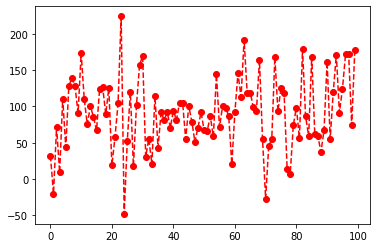

In [ ]:
import random 
import numpy as np
import matplotlib.pyplot as plt 
    
nums = [] #Almacenar los números aleatorios en una lista
mu = 100
sigma = 50
    
for i in range(100): 
    temp = random.gauss(mu, sigma)
    nums.append(temp) 
        
# plotting a graph 
plt.plot(nums,'ro--') 
plt.show()

Podemos crear un histograma para observar la función de densidad de la distribución gaussiana

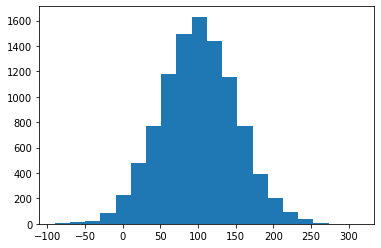

In [ ]:
nums = [] 
mu = 100
sigma = 50
    
for i in range(10000): 
    temp = random.gauss(mu, sigma) 
    nums.append(temp) 
        
# plot
plt.hist(nums, bins = 20) 
plt.show()

#**Distribución de Poisson**
Es una distribución de probabilidad discreta y es popular porque modela el número de veces que ocurre un evento en un intervalo de tiempo.

$$f(k) = \frac{\lambda^k}{k!}e^{-\lambda},$$

donde $k=0,1,2,...$ es el número de ocurrencias del evento o fenómeno.

El parámetro $\lambda >0$ representa el número de veces que se espera que ocurra el fenómeno durante un intervalo dado. 

####**Ejemplo:** 
En un estudio donde se graban pájaros en un parque nacional, se cuenta el número de veces que se graba el canto de un pájaro, y se quiere hacer un modelo del número de pájaros cantando en un minuto. Para esta tarea, asumirá la independencia de las aves detectadas.

Mirando los datos de las últimas horas, se observa que, en promedio, hay dos pájaros detectados en un intervalo de un minuto. El objetivo es conocer la probabilidad de que un número específico de pájaros cante en el próximo minuto; por ejemplo, cuál la probabilidad de que se observe 5 pájaros en el próximo minuto? 

Recuerda que $λ$ es el número esperado de veces que un pájaro canta en un intervalo de un minuto, por lo que en este ejemplo tienes λ=2.

Vamos a crear una función `poisson_distribution(k, lambd)` que tome el valor de $k$ y $λ$ y devuelva la probabilidad de observar $k$ ocurrencias (es decir, registrar $k$ cantos de pájaros).

In [ ]:
#   *** Distribución de Poisson  *** 

def poisson(k, lambd):
    return (lambd ** k * np.exp(-lambd)) / np.math.factorial(k)

poisson(k=5, lambd=2)

0.03608940886309672

Utilizando poisson del módulo [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html)

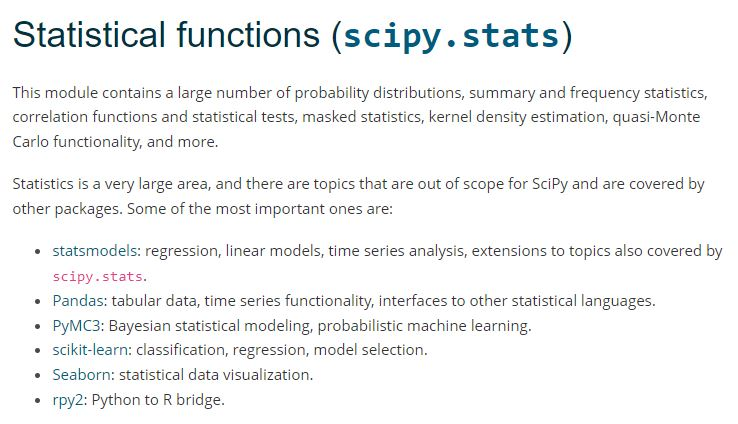

In [ ]:
from scipy.stats import poisson

poisson.pmf(5, 2)

0.03608940886309672

Trazando la distribución para varios valores de k:

Text(0.5, 0, 'X - No. de pájaros')

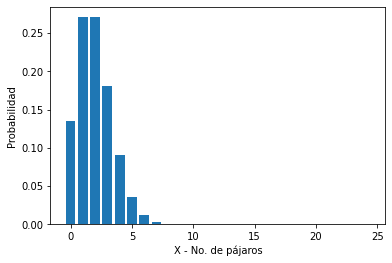

In [ ]:
lambd=2

k_axis = np.arange(0, 25)
distribucion = np.zeros(k_axis.shape[0])
for i in range(k_axis.shape[0]):
    distribucion[i] = poisson.pmf(i, lambd)

plt.bar(k_axis, distribucion)
plt.ylabel('Probabilidad')
plt.xlabel('X - No. de pájaros')

Y para diferentes valores de $\lambda$,

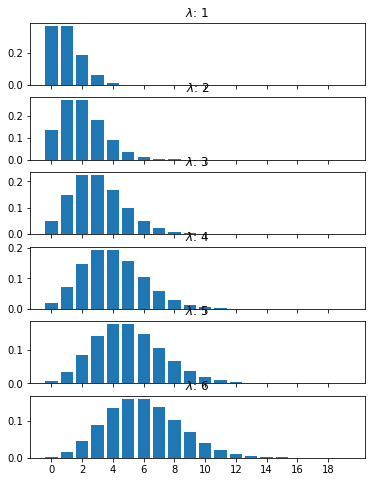

In [ ]:
f, axes = plt.subplots(6, figsize=(6, 8), sharex=True)

for lambd in range(1, 7):

    k_axis = np.arange(0, 20)
    distribucion = np.zeros(k_axis.shape[0])
    for i in range(k_axis.shape[0]):
        distribucion[i] = poisson.pmf(i, lambd)

    axes[lambd-1].bar(k_axis, distribucion)
    axes[lambd-1].set_xticks(np.arange(0, 20, 2))
    axes[lambd-1].set_title(f"$\lambda$: {lambd}")

# Add axes labels etc.


Usando las librerías de pyhton

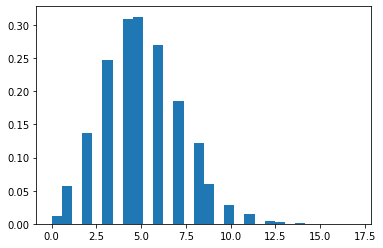

In [ ]:
import numpy as np
s = np.random.poisson(5, 10000)

plt.hist(s, 30, density=True)
plt.show()



In [ ]:
s = np.random.poisson(lam=(100., 500.), size=(100, 2)) #Dibujar cada 100 valores para lambda 100 y 500:

#**Muestreo directo**
El muestreo directo se puede ejemplificar con un divertido juego, donde varios niños dibujan en la arena un círculo grande y un cuadrado que lo contiene exactamente, como se muestra en la figura. Luego lanzan piedras al azar. Cada piedra que cae dentro del cuadrado constituye una prueba, y las piedritas dentro del círculo además se cuentan como “aciertos”.

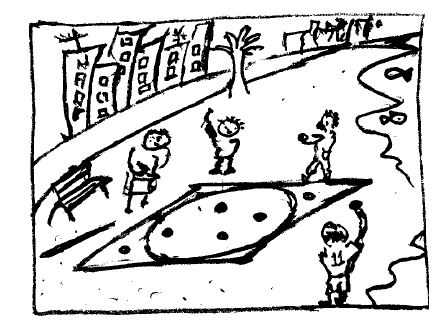 

Al hacer un seguimiento del número de intentos y aciertos, los niños realizan un cálculo de muestreo directo: la proporción entre aciertos y intentos es cercana a la proporción de las áreas del círculo y el cuadrado, es decir, $\pi/4$. En un juego de 4000 intentos, arrojaron 3156 piedritas dentro del círculo, esto significa que obtuvieron 3156 aciertos y obtuvieron la aproximación $\pi= 3.156$.

##**Ejemplo Direct sampling**

In [ ]:
import random

n_intentos = 4000
n_aciertos = 0
for iter in range(n_intentos):
    x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
    if x**2 + y**2 < 1.0: 
        n_aciertos += 1
print (4.0 * n_aciertos / float(n_intentos)) # Número pi

3.186


Direct_pi_multirun

In [ ]:
import random
 
def direct_pi(N):
    n_aciertos = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_aciertos += 1
    return n_aciertos
 
n_runs = 1000
n_intentos = 4000
for run in range(n_runs):
    print (4.0 * direct_pi(n_intentos) / float(n_intentos))

3.161
3.164
3.131
3.139
3.205
3.139
3.089
3.122
3.164
3.152
3.126
3.18
3.143
3.142
3.15
3.131
3.078
3.085
3.14
3.097
3.144
3.122
3.169
3.137
3.196
3.099
3.127
3.14
3.126
3.196
3.143
3.117
3.109
3.196
3.171
3.102
3.124
3.151
3.158
3.121
3.173
3.199
3.195
3.133
3.149
3.146
3.154
3.103
3.121
3.187
3.116
3.188
3.133
3.127
3.119
3.151
3.155
3.144
3.117
3.152
3.136
3.138
3.176
3.128
3.148
3.157
3.17
3.116
3.126
3.103
3.118
3.124
3.158
3.111
3.113
3.141
3.15
3.088
3.16
3.106
3.159
3.158
3.108
3.148
3.084
3.145
3.105
3.113
3.132
3.111
3.131
3.175
3.124
3.086
3.174
3.142
3.144
3.15
3.11
3.142
3.134
3.134
3.102
3.125
3.167
3.123
3.193
3.114
3.182
3.113
3.151
3.158
3.171
3.157
3.108
3.147
3.123
3.127
3.188
3.197
3.141
3.112
3.131
3.13
3.132
3.144
3.142
3.109
3.107
3.157
3.167
3.098
3.146
3.162
3.077
3.132
3.179
3.157
3.185
3.063
3.15
3.134
3.12
3.133
3.146
3.158
3.183
3.133
3.137
3.082
3.177
3.102
3.15
3.094
3.169
3.121
3.124
3.111
3.184
3.12
3.156
3.145
3.154
3.117
3.124
3.153
3.187
3.111
3.135


El valor que obtienen los niños para $pi$ es muy aproximado, y finalmente se vuelve exacto en el límite de un número infinito de intentos. Esta es la *ley débil de los grandes números* de Jacob Bernoulli. Los niños también adoptan otra regla: deciden el número total de lanzamientos antes de comenzar el juego. En uno de sus juegos donde "N = 4000", en algún momento tuvieron 355 aciertos para 452 intentos, esto da una muy buena calificación.

Sin dudarlo, continuaron hasta que se lanzó la piedra número 4000. Entienden que uno no debe detener un cálculo estocástico simplemente porque el resultado es correcto, ni debe continuar jugando porque el resultado no se acerca lo suficiente a lo que creemos que debería ser la respuesta.

### **Ley de grandes números**
Considere el valor promedio de $n$ cantidades

$${\overline {X}}_{n}={\frac {1}{n}}(X_{1}+\cdots +X_{n}) $$

La ley de grandes números dice que este valor converge al valor esperado $\mu$ conforme $n$ tiende a infinito, es decir, 

\begin{matrix}{}\\
{\overline {X}}_{n}\,\to \,\mu \qquad {\textrm {para}}\qquad n\to \infty .\\{}
\end{matrix} 

Por ejemplo, en valor esperado en el lanzamiento de un dado es dado por

$${\frac{1+2+3+4+5+6}{6}}=3.5$$ 

Si se lanza el dado muchas veces y se calcula ${\overline {X}}_{n}$, vemos que este valor tiende a $3.5$ conforme $n$ crece. Igual la probabilidad, esta tiende a $1/6\approx0.16667$. Veamos esto en el siguiente experimento numérico:

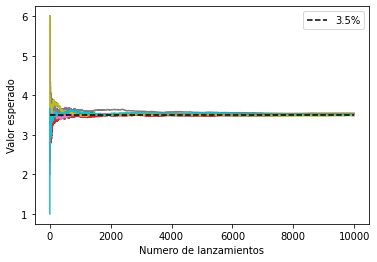

In [ ]:
#------------ LEY DE GRANDES NÚMEROS---------------------------
# Aquí se aplica la ley de grandes números al lanzamiento de un 
# dado

import numpy as np
from matplotlib.pyplot import *

## --------------------1) EJEMPLO -----------------------------
# El valor esperado de lanzar un dado n veces
# tiende a 3.5 a medida que n se hace grande:

figure(1)

n = 10000             # max numero de lanzamientos
x = np.arange(1,n+1)  # eje x
for i in range(10): # repetir 10 veces
  r = np.random.randint(1,7, size=n) # array aleatorio en [1,6] 
  p = np.cumsum(r)/x # suma cumulativa 
  plot(x,p)         

plot([0,n],[3.5,3.5],'k--',label='3.5%') # valor limite

plt.xlabel("Numero de lanzamientos")
plt.ylabel("Valor esperado")
legend()



**Tarea**:La ley de grandes números tiene aplicación en muchas áreas de la física, por ejemplo en termodinámica 
la temperatura tiende a un valor fijo a medida que 
se incrementa el número de partículas $n$ a densidad constante.
Calcule la temperatura promedio a partir de la energía cinética promedio como función del número de partículas $n$ para un gas a densidad constante $\rho=\frac{nm}{V}=1.0$ unidades, si
$$    E_{\text{k}}={\frac {1}{2}}mv_{\mathrm {rms} }^{2}={\frac {3}{2}}KT,$$
donde $v_{rms}={\sqrt {\langle v^{2} \rangle}}$ y $K=1.38064852\times10^{23}$ J/K es la constante de Boltzmann. 

### **Camino aleatorio**
El camino aleatorio en 2 dimensiones se genera a partir de generar pasos consecutivos en el intervalo $[-1,1]$. (ver libro Landau-Paéz para teoría).

Código que simula el movimiento aleatorio de un partícula en 2D:

Text(0.5, 1.0, 'Camino aleatorio 2D')

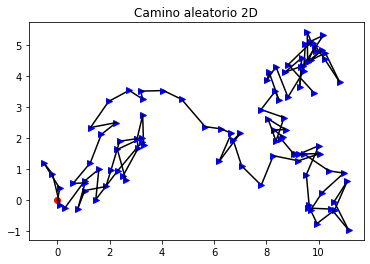

In [ ]:
N = 100         # pasos
x=0;  y=0       # posición paso actual
x0=0; y0=0      # posición paso anterior
plt.plot(x0,y0,'ro')# origen

for i in range(N):
   x += ( np.random.rand() - 0.5 )*2. # -1 =< x =< 1
   y += ( np.random.rand() - 0.5 )*2. # -1 =< y =< 1
   
   plt.plot([x0, x],[y0, y],'k-')
   plt.plot(x,y,"b>")
   #plt.arrow(x0, y0, x-x0, y-y0,head_width=0.2, head_length=0.3, fc='k', ec='b')
   x0=x; y0=y
plt.title("Camino aleatorio 2D")

### **Decaimiento Exponencial**

Código python para la simulación del decaimiento exponencial (ver libro Landau-Paéz para teoría): 

Text(0.5, 1.0, '$P(t) = \\Delta N(t)/N(t)/\\Delta t = -\\lambda$')

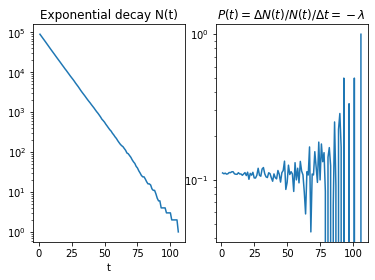

In [ ]:
# Decay.py spontaneous decay simulation
import matplotlib.pyplot as plt
import numpy as np

lamda = 1.e-1 # Decay constant
N = 100000
t = 0
tt = []
Nt = []
DeltaNt = []

while N > 1:    
    DeltaN = 0
    for i in range(N):
        if ( np.random.rand() < lamda ): DeltaN += 1

    t += 1.
    N -= DeltaN
    
    tt= np.append(tt,t)
    Nt= np.append(Nt,N)
    DeltaNt = np.append(DeltaNt,DeltaN)
    
plt.subplot(121) #(211)
plt.semilogy(tt,Nt)
plt.title("Exponential decay N(t)")
plt.xlabel("t")

plt.subplot(122) #(212)
plt.semilogy(tt,DeltaNt/Nt) # probability P = N/dN/dt = -lambda
plt.title(r"$P(t) = \Delta N(t)/N(t)/\Delta t = -\lambda$")

#**Markov Sampling**
Imaginemos el mismo juego de niños pero en un área mayor para que jueguen los adultos. Como el campo de juego es mucho más amplio que antes, el juego debe ser modificado. Cada jugador tiene una bolsa llena de piedras y comienza con los ojos cerrados, lanza la primera piedra pequeña en una dirección aleatoria y luego camina hacia donde ha caído esta piedra. En esa posición, se saca una nueva piedra del bolso y sigue un nuevo lanzamiento. Como antes, el objetivo del juego es barrer el cuadrado uniformemente para calcular el número $\pi$, pero la distancia que los jugadores pueden recorrer desde donde están es mucho menor que las dimensiones del campo. Siempre que hay un rechazo surge un problema, como en el caso cuando se lanza una piedra a una posición fuera dl área cuadrada. No es fácil entender si simplemente debe seguir adelante o continuar hasta que, por accidente, regrese al área en cuestión.

Lo que debe hacer el jugador, tras un lanzamiento fuera del área de interés, es lo siguiente: donde esté parado, ya hay una piedrecita en el suelo. Ahora debería pedirle a alguien que le traiga la "piedra fugitiva", colocarla encima de la piedra que ya está en el suelo y usar una piedra nueva para intentar otro lanzamiento. Si vuelve a ser una “piedra fugitiva”, debe ir a buscarlo y aumentar la pila en uno otra vez, etc. Eventualmente, el jugador sigue adelante, visita otras áreas del cuadrado y también se acerca al centro, que no tiene rechazos. 


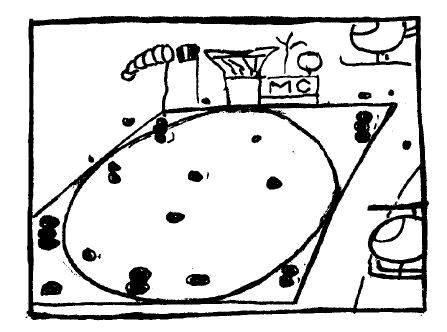

Cuando se termina el juego, se puede notar un patrón extraño de las piedras en el suelo: muy adentro del cuadrado, solo hay piedras sueltas, porque desde allí, la gente no tira lo suficiente lejos para salirse del cuadrado. Sin embargo, cerca de los linderos, y especialmente en las esquinas, aparecen montones de varias piedras. Lo interesante es que no cambia el hecho de que $\pi$ resulta ser aproximadamente cuatro veces la proporción entre aciertos e intentos.



Cualquier movimiento que nos lleve fuera de la plataforma es rechazado: no nos movemos y contamos la configuración por segunda vez.

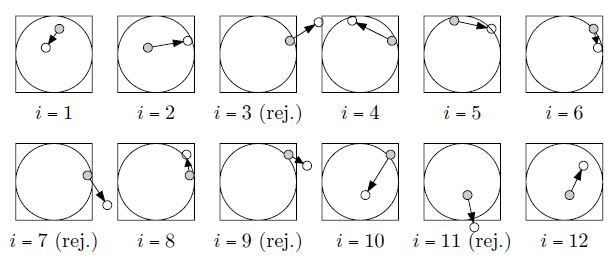

Notemos que esto es lo que define una cadena de Markov: la probabilidad de generar la configuración $i + 1$ depende sólo de la configuración precedente, $i$, y no de configuraciones anteriores.

Markov_pi

In [ ]:
import random

x, y = 1.0, 1.0
delta = 0.1
n_intentos = 4000
n_aciertos = 0
for i in range(n_intentos):
    del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
    if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
        x, y = x + del_x, y + del_y
    if x**2 + y**2 < 1.0: n_aciertos += 1
print (4.0 * n_aciertos / float(n_intentos))

3.094


Markov_pi_multirun

In [ ]:
import random

def markov_pi(N, delta): 
    x, y = 1.0, 1.0
    n_aciertos = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_aciertos += 1
    return n_aciertos

n_runs = 1000
n_intentos = 4000
delta = 0.1
for run in range(n_runs):
    print (4.0 * markov_pi(n_intentos, delta) / float(n_intentos))

2.892
3.112
3.019
2.986
3.387
2.967
3.284
3.348
2.922
3.116
3.024
3.269
3.25
3.134
2.947
3.264
3.222
2.711
3.442
2.827
3.201
3.058
3.243
3.218
3.032
3.052
3.538
3.157
2.948
2.82
3.401
3.0
3.233
2.889
3.031
3.219
2.891
3.074
3.089
2.903
2.78
3.025
3.112
3.011
3.308
3.031
2.872
3.272
3.213
3.317
2.672
3.336
3.254
3.207
3.128
3.031
3.051
3.067
3.171
2.883
3.162
3.291
3.254
3.091
2.899
3.283
3.106
2.842
3.281
3.026
3.036
3.081
2.847
2.721
2.856
3.075
3.277
3.27
3.319
3.076
3.195
3.209
3.225
2.945
2.668
3.142
2.823
3.006
3.063
3.198
3.028
3.386
2.968
3.166
2.901
3.048
3.312
3.065
3.197
2.962
3.417
2.489
3.123
2.75
3.069
3.216
2.882
3.374
3.508
2.803
3.037
3.038
2.719
3.186
2.887
3.197
2.835
3.323
3.247
2.895
3.217
3.224
3.13
3.026
2.884
3.096
3.078
3.285
3.447
3.084
3.053
2.808
3.49
3.299
2.977
3.315
3.438
3.19
3.195
3.461
2.989
3.395
2.926
2.967
3.236
3.328
3.25
3.371
2.932
3.129
3.279
3.253
2.723
3.268
3.609
3.108
3.104
3.204
2.727
2.668
3.408
3.225
2.987
3.203
3.367
3.215
2.881
3.274
3.3

En el muestreo directo, no hay problema con el rango de lanzamiento, no hay que preocuparse por las condiciones iniciales y hay un análisis de error sencillo. Sin embargo, el muestreo en cadena de Markov, por otro lado, nos obliga a ser mucho más cuidadosos con todos los aspectos de nuestro cálculo. El tema crítico aquí es el tiempo de correlación, durante el cual la piedra guarda un recuerdo de la configuración inicial. Este tiempo puede llegar a ser astronómico. En las aplicaciones habituales, a menudo uno está satisfecho con un puñado de muestras independientes, obtenidas a través de cálculos de una semana, pero puede requerir mucho pensamiento y experiencia para garantizar que se logre incluso este modesto objetivo. 

#**Rejection Sampling**
Von Neumann dedujo un método simple e ingenioso para generar puntos aleatorios con una distribución de probabilidad $w(x)$. Imagine una gráfica de $w(x)$ vs $x$, 

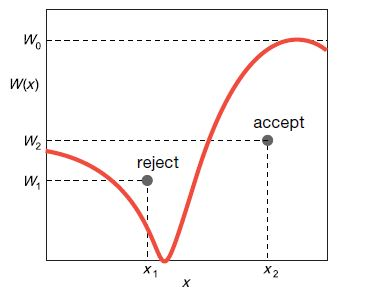

Se acepta un punto aleatorio si se encuentra por debajo de la curva de $W(x)$ y se rechaza si se encuentra por encima. Esto genera una distribución aleatoria ponderada para cualquier función $W(x)$ que se represente.

Así que, generamos una distribución uniforme en $x$ y $y\equiv W$ con el máximo valor de $y$ igual a el ancho de la caja $W_0$:

$$(x_i , W_i) = (r_{2i-1}, W_0r_{2i})$$

Entonces, rechazamos todos los $x_i$ que no caen dentro de la caja:

If $W_i < w(x_i)$, aceptar, If $W_i > w(x_i)$, rechazar.

Los valores de $x_i$ aceptados tendrán lun peso $w(x)$ (como se muestra en la figura anterior). La mayor aceptación ocurre donde $w(x)$ es grande, en este caso para $x$ de rango medio. 


El muestreo por rechazo es la forma conceptualmente más simple de generar muestras de alguna función de probabilidad arbitraria sin tener que hacer ninguna transformación. Digamos que se desea muestrear la función

$$f(x) = 1.2 -x^4$$

con $0\le x \le 1$

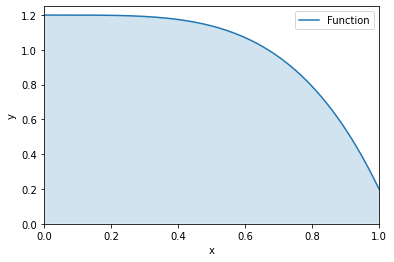

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1.2 - x**4

xs = np.linspace(0, 1, 1000)
ys = f(xs)

plt.plot(xs, ys, label="Function") 
plt.fill_between(xs, ys, 0, alpha=0.2)
plt.xlim(0, 1), plt.ylim(0, 1.25), plt.xlabel("x"), plt.ylabel("y"), plt.legend();

Podemos ver que la función que nos interesa va de 0 a 1 en el eje $x$ y de 0 a 1.2 en el eje $y$. Entonces, tomar muestras de él usando rejection sampling se hace de la siguiente manera:

* **1.** Elige dos números al azar. Uno para $x$ (entre 0 y 1), uno para $y$
  (entre 0 y 1.2).
* **2.**Si el valor de $y$ que elegimos al azar es menor que $f(x)$ se conserva; de lo contrario, regrese al paso 1.

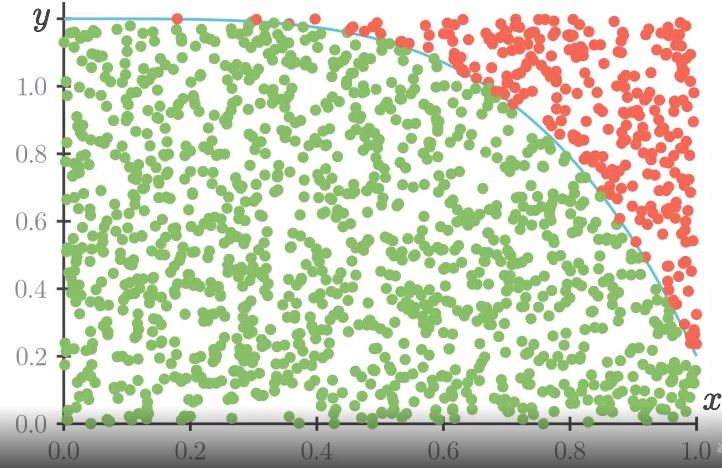

Este método de rechazo debe especificar un rango inicial para elegir los límites de $x$ y los límites de $y$, lo cual hace que el algoritmo no sea adecuado para distribuciones que tienen un rango infinito de valores de x.

In [ ]:
def sample(function, xmin=0, xmax=1, ymax=1.2):
    while True:
        x = np.random.uniform(low=xmin, high=xmax)
        y = np.random.uniform(low=0, high=ymax)
        if y < function(x):
            return x

Vamos a generar diez mil muestras y trazar su distribución para asegurarnos de que el algoritmo funciona.

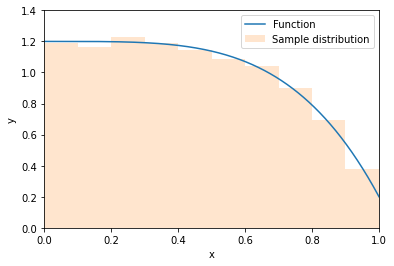

In [ ]:
samps = [sample(f) for i in range(10000)]

plt.plot(xs, ys, label="Function")
plt.hist(samps, density=True, alpha=0.2, label="Sample distribution")
plt.xlim(0, 1), plt.ylim(0, 1.4), plt.xlabel("x"), plt.ylabel("y"), plt.legend();

Si queremos muestrear una distribución gaussiana como esta:

$$f(x) = e^{-\pi x^2}$$

definido sobre todos los valores de $X$, $\int_{\infty}^{\infty}e^{-\pi x^2}= 1$

¿Qué pasa con este método de muestreo si queremos obtener un valor atípicos en los extremos?

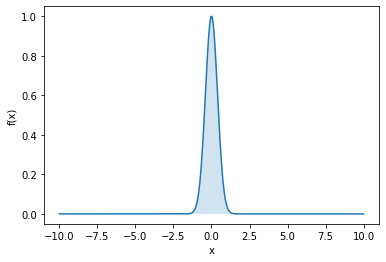

In [ ]:
def gauss(x):
    return np.exp(-np.pi * x**2)

xs = np.linspace(-10, 10, 1000)
ys = gauss(xs)

plt.plot(xs, ys)
plt.fill_between(xs, ys, 0, alpha=0.2)
plt.xlabel("x"), plt.ylabel("f(x)");

Hay una gran cantidad de espacio en blanco en los extremos!

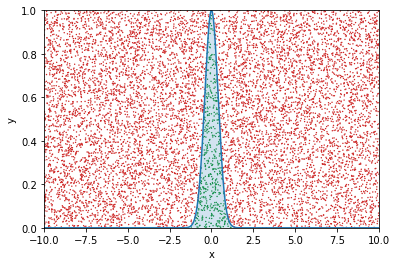

In [ ]:
def rejectSampling(function, num_samples, xmin=-10, xmax=10, ymax=1):
    x = np.random.uniform(low=xmin, high=xmax, size=num_samples)
    y = np.random.uniform(low=0, high=ymax, size=num_samples)
    passed = (y < function(x)).astype(int)
    return x, y, passed

x, y, passed = rejectSampling(gauss, 10000)

plt.plot(xs, ys)
plt.fill_between(xs, ys, 0, alpha=0.2)
plt.scatter(x, y, c=passed, cmap="RdYlGn", vmin=-0.1, vmax=1.1, lw=0, s=2)
plt.xlabel("x"), plt.ylabel("y"), plt.xlim(-10, 10), plt.ylim(0, 1);


In [ ]:
print(f"Efficiency is only {passed.mean() * 100:0.1f}%")

Efficiency is only 5.0%


#**Importance sampling**

El muestreo de importancia es un método para reducir la varianza en la integración de Monte Carlo al elegir un estimador cercano a la forma de la función real.

Se calcula a partir de:

$I =\int_a^b dx f(x) = \int_a^b dx w(x)\dfrac{f(x)}{w(x)}$

Si usamos la distribución de probabilidad para nuestros números aleatorios que incluyen x(x), la integral puede ser aproximada a 

$I=\langle\dfrac{f}{w}\rangle \simeq \dfrac{1}{N}\sum_{i=1}^{N}\dfrac{f(x_i)}{w(x_i)}$

La mejora que surge de la ecuación anterior es que con una buena elección de la función de ponderación $w(x) ∝ f (x)$, podemos hacer que $f (x)∕w(x)$ sea más constante y, por lo tanto, más fácil de integrar con precisión.

Vamos a trabajar la siguiente función

$$\int_{∞}^{∞}\dfrac{1+x^2}{\sqrt{2\pi}} e^{-x^2/2} dx$$

para muestrear de $-∞$ hasta $+∞$ podemos separar la función en dos partes. Por ejemplo, en un polinomio multiplicado por una distribución normal:

$$\int_{∞}^{∞}(1+x^2) \mathcal{N}(\mu,\,\sigma^{2}) dx \,\,\, → \,\,\, \int_{∞}^{∞}(1+x^2) \mathcal{N}(0,\,1) dx$$

donde $\mathcal{N}(0,\,1)$ es una distribución normal, centrada en 0, con un ancho de 1. Y al igual que antes, ahora tenemos dos partes: la primera parte para calcular y la segunda parte de la que podemos tomar muestras.

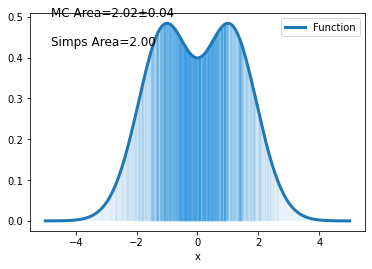

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# MC integration here
samples_2 = np.random.normal(size=1000)
fn_2 = 1 + samples_2 ** 2
area_2 = fn_2.mean()
error_2 = np.std(fn_2) / np.sqrt(fn_2.size)

# Simps integration here
def fn2(xs):
    return (1 + xs**2) * np.exp(-(xs**2)/2) / np.sqrt(2 * np.pi)
xs = np.linspace(-5, 5, 200)
ys = fn2(xs)
area_simps = simps(ys, x=xs)

# And of course, plotting here
plt.plot(xs, ys, label="Function", lw=3)
plt.fill_between(xs, 0, ys, alpha=0.1)
plt.text(-4.8, 0.5, f"MC Area={area_2:0.2f}±{error_2:0.2f}", fontsize=12)
plt.text(-4.8, 0.43, f"Simps Area={area_simps:0.2f}", fontsize=12)
plt.plot((samples_2, samples_2), ([0 for i in samples_2], [fn2(i) for i in samples_2]), 
         c='#1c93e8', lw=0.2, ls='-', zorder=-1, alpha=0.5)
plt.xlabel("x"), plt.legend();

Cada línea azul nos muestra una muestra específica. 

Cuando usamos importance sampling, tenga en cuenta que no necesitamos tener una función de probabilidad con la que pueda muestrear perfectamente en su ecuación. Puedes poner cualquier PDF (como hicimos con la distribución uniforme) y simplemente dividir la ecuación original por ese PDF. Cambiemos un poco la función con la que trabajamos este algoritmo:

Imagen si cambiamos nuestra función desde arriba solo un poquito:


$$\int_{∞}^{∞}\dfrac{1+x^2}{\sqrt{2\pi}} e^{-x^4/2} dx$$

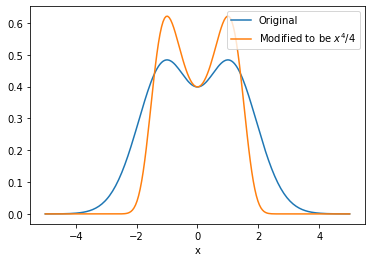

In [ ]:
def fn3(xs):
    return (1 + xs**2) * np.exp(-(xs**4)/4) / np.sqrt(2 * np.pi)

ys3 = fn3(xs)
plt.plot(xs, ys, label="Original")
plt.plot(xs, ys3, label="Modified to be $x^4/4$")
plt.legend(); plt.xlabel("x");

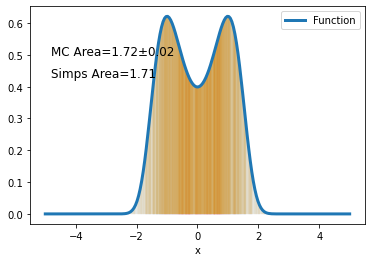

In [ ]:
from scipy.stats import norm

# MC integration here
x_samp = norm.rvs(size=2000)
p_of_x = norm.pdf(x_samp)
vals = fn3(x_samp) / p_of_x
area = vals.mean()
error = np.std(vals) / np.sqrt(vals.size)

# Simps integration here
xs = np.linspace(-5, 5, 200)
ys = fn3(xs)
area_simps = simps(ys, x=xs)

# And of course, plotting here
plt.plot(xs, ys, label="Function", lw=3)
plt.fill_between(xs, 0, ys, alpha=0.1)
plt.text(-4.8, 0.5, f"MC Area={area:0.2f}±{error:0.2f}", fontsize=12)
plt.text(-4.8, 0.43, f"Simps Area={area_simps:0.2f}", fontsize=12)
plt.plot((x_samp, x_samp), ([0 for i in x_samp], [fn3(i) for i in x_samp]), 
         c='#e89a1c', lw=0.2, ls='-', zorder=-1, alpha=0.3)
plt.xlabel("x"), plt.legend();

En resumen:

* Elija una distribución que se parezca a su función, o simplemente use una distribución uniforme.

* Muestre los puntos de esa distribución.

* Obtenga la función en esos puntos y divídala por $p(x)$.

* Tome la media para la estimación y la desviación estándar/raíz (N) para el error.

